In [1]:
columns = {
    "ema15" : "EMA fast, period=15",
    "ema50" : "EMA slow, period=50",
    "ema200" : "EMA long, period=200",
    "vol_sma20" : "SMA(vol,20)",
    "dma15" : "delta - ema15[0]-ema15[1]",
    "dma50" : "delta - dma50[0]-dma50[1]",
    "dma200": "delta - dma200[0]-dma200[1]",
    "macd" : "ema15 - ema50",
    "sig" : "avg(macd, 10)",
    "diff" : "macd - sig",
    "trend" : "ema50 - ema200",
    "chg" : "change over prior day",
    "chg5day" : "(price[0] - price[5]) / price[0]",
    "chg10day" : "(price[0] - price[10]) / price[0]",
    "chg20day" : "(price[0] - price[20]) / price[0]",
    "chg50day" : "(price[0] - price[50]) / price[0]",
    "chg100day" : "(price[0] - price[100]) / price[0]",
    "chg200day" : "(price[0] - price[200]) / price[0]",
    "chg5ptl" : "percentail of chg5 among a set",
    "chg10ptl" : "percentail of chg10 among a set",
    "chg20ptl" : "percentail of chg20 among a set",
    "chg50ptl" : "percentail of chg50 among a set",
    "chg100ptl" : "percentail of chg100 among a set",
    "chg200ptl" : "percentail of chg200 among a set",
}

In [2]:
columns.keys()

dict_keys(['ema15', 'ema50', 'ema200', 'vol_sma20', 'dma15', 'dma50', 'dma200', 'macd', 'sig', 'diff', 'trend', 'chg', 'chg5day', 'chg10day', 'chg20day', 'chg50day', 'chg100day', 'chg200day', 'chg5ptl', 'chg10ptl', 'chg20ptl', 'chg50ptl', 'chg100ptl', 'chg200ptl'])

In [3]:
import yfinance as yf
import cufflinks as cf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# !pip3 install cufflinks

In [26]:
symbol = "PFE" # "KHC" # "QQQ"  # "ORCL"
df = yf.download(symbol)

[*********************100%***********************]  1 of 1 completed


In [27]:
df.shape

(12253, 6)

In [28]:
df.head(), df.tail()

(                Open      High       Low     Close  Adj Close   Volume
 Date                                                                  
 1972-06-01  0.000000  0.815346  0.802993  0.815346   0.184002  2458800
 1972-06-02  0.815346  0.817817  0.802993  0.805463   0.181772  1613900
 1972-06-05  0.805463  0.807934  0.798051  0.802993   0.181214  2585300
 1972-06-06  0.802993  0.825229  0.800522  0.820288   0.185117  2347500
 1972-06-07  0.820288  0.820288  0.807934  0.820288   0.185117  1032100,
                  Open       High        Low      Close  Adj Close    Volume
 Date                                                                       
 2020-12-23  37.009998  37.650002  36.880001  37.439999  37.439999  36182000
 2020-12-24  37.400002  37.570000  37.180000  37.270000  37.270000  14790100
 2020-12-28  37.360001  37.580002  36.680000  36.820000  36.820000  26993700
 2020-12-29  36.900002  37.200001  36.790001  37.049999  37.049999  23116600
 2020-12-30  37.029999  37.240002

In [29]:
n = 0
for i in df.index:
    n += 1
    if n > 2: break
    print(i)

1972-06-01 00:00:00
1972-06-02 00:00:00


In [30]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-16,38.180000,38.470001,37.740002,37.840000,37.840000,56515300
2020-12-17,37.830002,38.119999,37.310001,38.029999,38.029999,52036400
2020-12-18,37.990002,38.090000,37.500000,37.680000,37.680000,60259200
2020-12-21,37.279999,37.400002,36.910000,37.380001,37.380001,40891800
2020-12-22,37.209999,37.330002,36.599998,36.740002,36.740002,33634400
2020-12-23,37.009998,37.650002,36.880001,37.439999,37.439999,36182000
2020-12-24,37.400002,37.570000,37.180000,37.270000,37.270000,14790100
2020-12-28,37.360001,37.580002,36.680000,36.820000,36.820000,26993700
2020-12-29,36.900002,37.200001,36.790001,37.049999,37.049999,23116600


## Calculate TA

In [32]:
df["tp"] = (df["High"]+df["Low"]+df["Close"]) / 3.0

df["vol_sma20"] = df["Volume"].rolling(20).mean()

# calculate EMA
for i in [15,50,200]:
    # SMA is slower than EMA
    # df[f"ema{i}"] = df["Close"].rolling(i).mean()
    # EMA is closer to price movement
    # df[f"ema{i}"] = df["Close"].ewm(span=i).mean()
    # EMA of TypicalPrice is bit smoother
    df[f"ema{i}"] = df["tp"].ewm(span=i).mean()
    
# calculate ema diff
for i in [15,50,200]:
    df[f"dma{i}"] = df[f"ema{i}"].diff()
    
# calculate MACD
DIFF_FACTOR = 3.0
TREND_FACTOR = 0.4
SIGNAL_PERIOD = 10
df["macd"] = df["ema15"] - df["ema50"]
df["sig"] = df["macd"].rolling(SIGNAL_PERIOD).mean()
df["diff"] = DIFF_FACTOR*(df["macd"] - df["sig"])
df["trend"] = TREND_FACTOR*(df["ema50"] - df["ema200"])


# calculate changes
df["chg"] = df["Close"].diff() / df["Close"]

for i in [5,10,20,50,100,200]:
    df[f"chg{i}day"] = df["Close"].diff(periods=i) / df["Close"]

In [37]:
cf.set_config_file(theme='pearl',sharing='public',offline=True)

In [38]:
df.iplot(kind="candle",
          keys=["Open", "High", "Low", "Close"],
          rangeslider=True
)

In [39]:
begin_dt, end_dt = "2018-08-01", "2021-01-01"
begin_dt, end_dt = "2020-01-01", "2021-01-01"
df2 = df.loc[begin_dt:end_dt]

In [40]:
df2

,Open,High,Low,Close,Adj Close,Volume,tp,ema15,ema50,ema200,...,sig,diff,trend,chg,chg5day,chg10day,chg20day,chg50day,chg100day,chg200day
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,37.286526,37.333965,36.888046,37.134724,35.677311,16514100,37.118912,36.974537,36.266848,36.881397,...,0.702836,0.009705,-0.245819,-0.001022,-0.003832,0.006132,0.027849,0.068472,0.071283,-0.080736
2020-01-03,36.736244,37.229603,36.688805,36.935482,35.485886,14922800,36.951296,36.971632,36.293690,36.882093,...,0.708925,-0.061965,-0.235361,-0.005394,-0.011559,0.001027,0.020293,0.064218,0.090932,-0.083226
2020-01-06,36.831120,37.001896,36.717266,36.888046,35.440315,15772000,36.869069,36.958812,36.316253,36.881963,...,0.709619,-0.134122,-0.226284,-0.001286,-0.011317,-0.002315,0.021862,0.054270,0.094650,-0.089249
2020-01-07,37.115749,37.125237,36.698292,36.764706,35.321815,20108100,36.862745,36.946803,36.337684,36.881772,...,0.703523,-0.188809,-0.217635,-0.003355,-0.004129,-0.012387,0.011871,0.060903,0.116387,-0.080000
2020-01-08,36.774193,37.210625,36.764706,37.058823,35.604385,16403500,37.011384,36.954876,36.364104,36.883062,...,0.692400,-0.203256,-0.207583,0.007936,-0.003072,-0.006656,0.018945,0.058628,0.117255,-0.072453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,37.009998,37.650002,36.880001,37.439999,37.439999,36182000,37.323334,38.449870,37.486728,35.807074,...,1.825352,-1.724421,0.671862,0.018697,-0.010684,-0.117788,0.022436,0.064918,0.028173,0.184780
2020-12-24,37.400002,37.570000,37.180000,37.270000,37.270000,14790100,37.340000,38.311136,37.480974,35.822327,...,1.664615,-1.668905,0.663459,-0.004561,-0.020392,-0.119667,0.019855,0.061671,0.022722,0.235794
2020-12-28,37.360001,37.580002,36.680000,36.820000,36.820000,26993700,37.026667,38.150577,37.463158,35.834310,...,1.484724,-1.594609,0.651539,-0.012222,-0.023357,-0.116784,-0.011135,0.058191,0.009232,0.157139


In [41]:
df2.iplot(kind="candle",
          keys=["Open", "High", "Low", "Close"],
          rangeslider=True
)

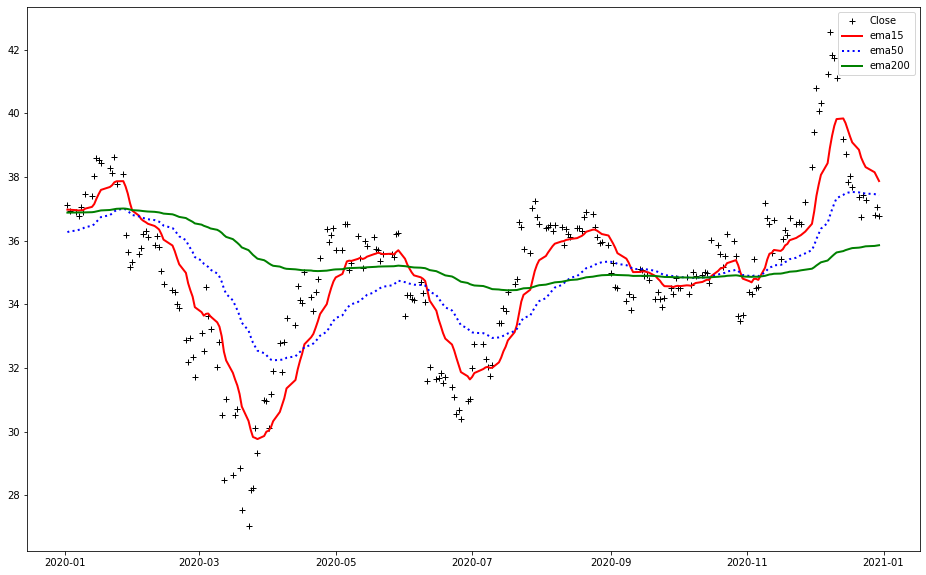

In [42]:
plt.figure(figsize=(16,10))
plt.plot('Close', data=df2, marker='+', color='black', linestyle="None")
plt.plot('ema15', data=df2, marker='', color='red', linewidth=2)
plt.plot('ema50', data=df2, marker='', color='blue', linewidth=2, linestyle='dotted', label="ema50")
plt.plot('ema200', data=df2, marker='', color='green', linewidth=2, linestyle='solid', label="ema200")
plt.legend()

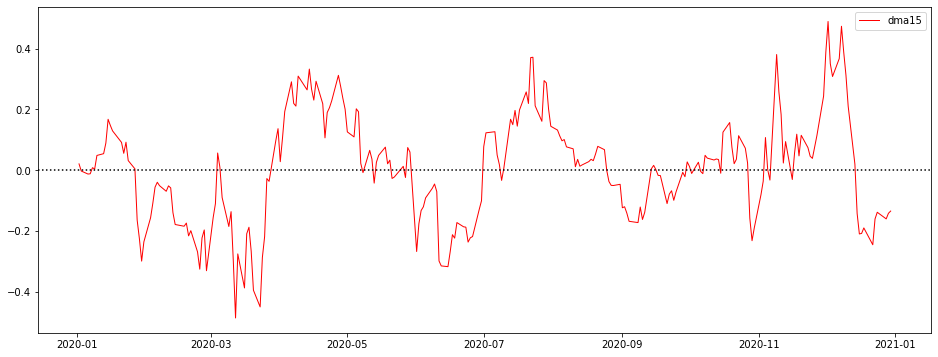

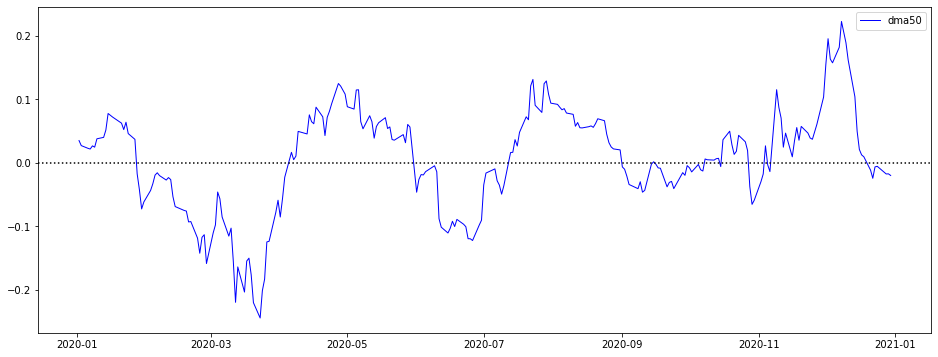

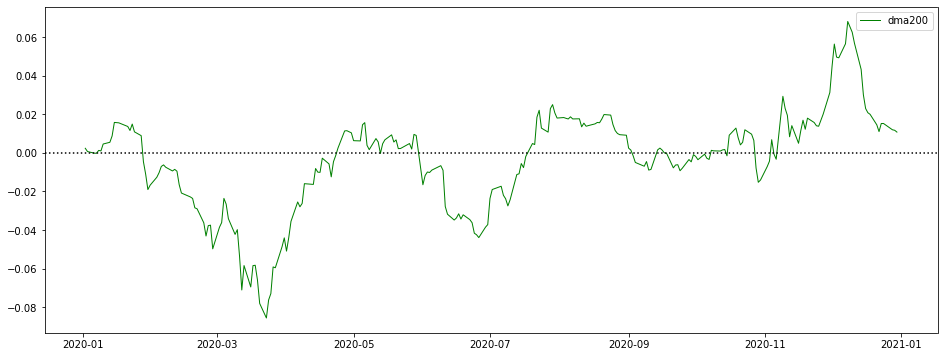

In [43]:
col_names = ['dma15', 'dma50', 'dma200']
color_map = ['red', 'blue', 'green']

for idx in range(len(col_names)):
    plt.figure(figsize=(16,6))
    plt.plot(col_names[idx], data=df2, marker='', color=color_map[idx], linewidth=1, linestyle='solid', label=col_names[idx])
    plt.axhline(y=0, color='black', linestyle="dotted")
    plt.legend()

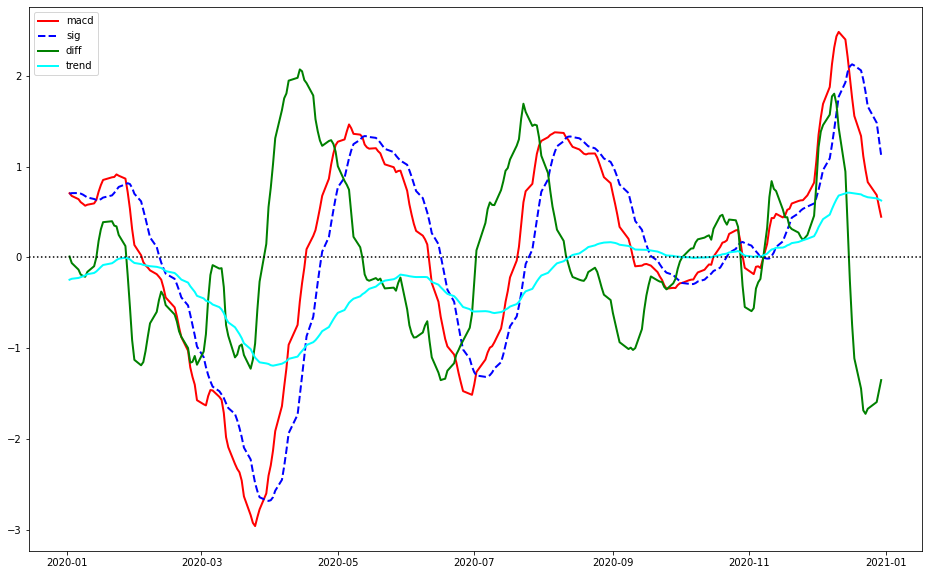

In [44]:
plt.figure(figsize=(16,10))
plt.plot('macd', data=df2, marker='', color='red', linewidth=2, label="macd")
plt.plot('sig', data=df2, marker='', color='blue', linewidth=2, linestyle='dashed', label="sig")
plt.plot('diff', data=df2, marker='', color='green', linewidth=2, linestyle='solid', label="diff")
plt.plot('trend', data=df2, marker='', color='cyan', linewidth=2, linestyle='solid', label="trend")
plt.axhline(y=0, color='black', linestyle="dotted")
plt.legend()

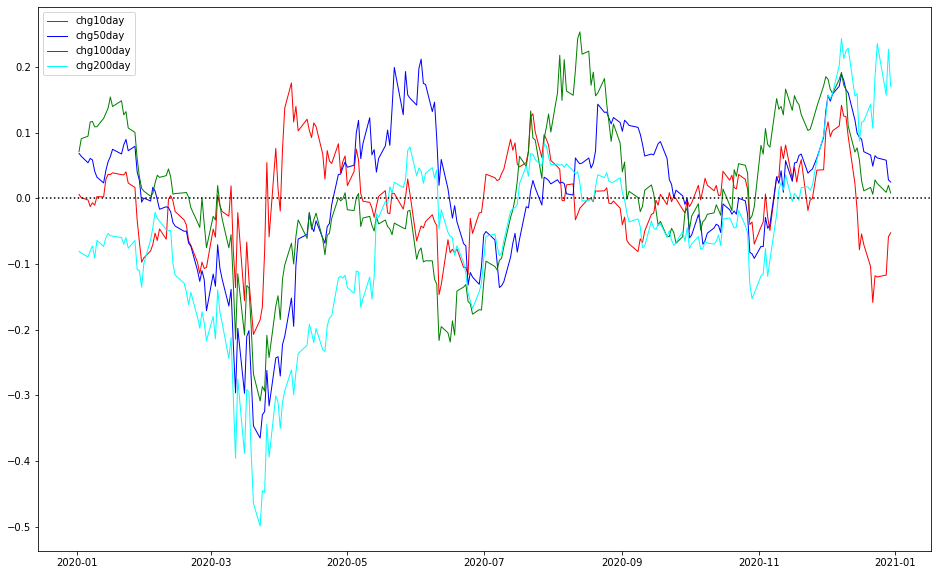

In [45]:
plt.figure(figsize=(16,10))
plt.plot('chg10day', data=df2, marker='', color='red', linewidth=1, label="chg10day")
plt.plot('chg50day', data=df2, marker='', color='blue', linewidth=1, linestyle='solid', label="chg50day")
plt.plot('chg100day', data=df2, marker='', color='green', linewidth=1, linestyle='solid', label="chg100day")
plt.plot('chg200day', data=df2, marker='', color='cyan', linewidth=1, linestyle='solid', label="chg200day")
plt.axhline(y=0, color='black', linestyle="dotted")
plt.legend()

In [46]:
col_names = ['chg5day', 'chg10day', 'chg20day', 'chg50day', 'chg100day', 'chg200day']
# col_idx_map = {}
# for i,nm in enumerate(col_names):
#     col_idx_map[i] = nm

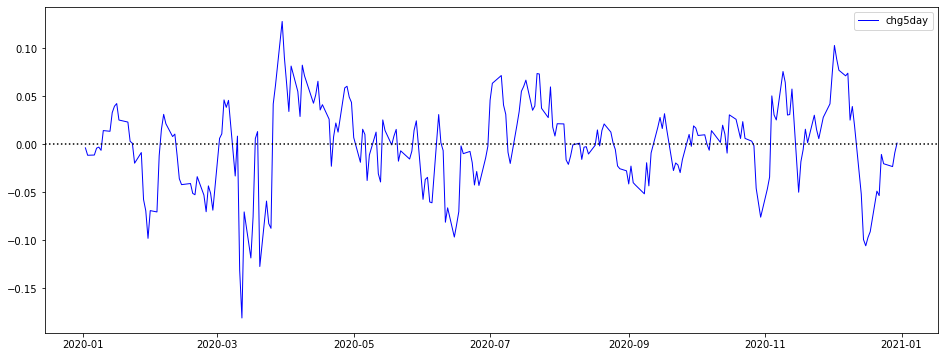

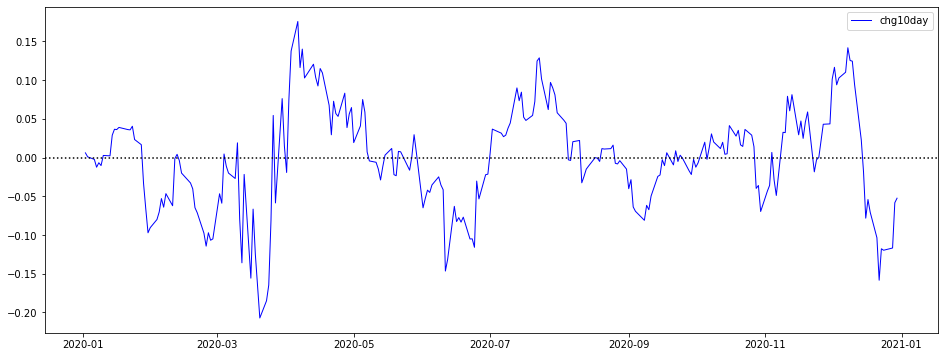

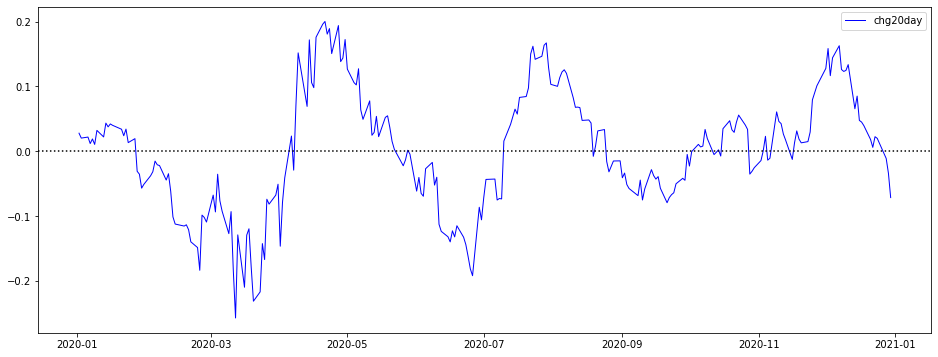

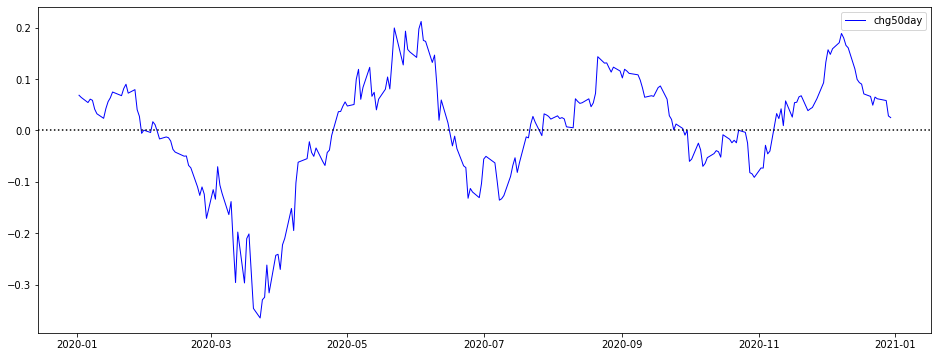

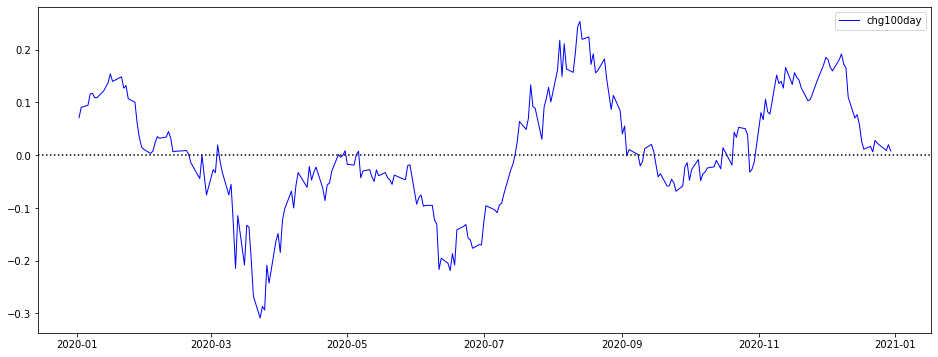

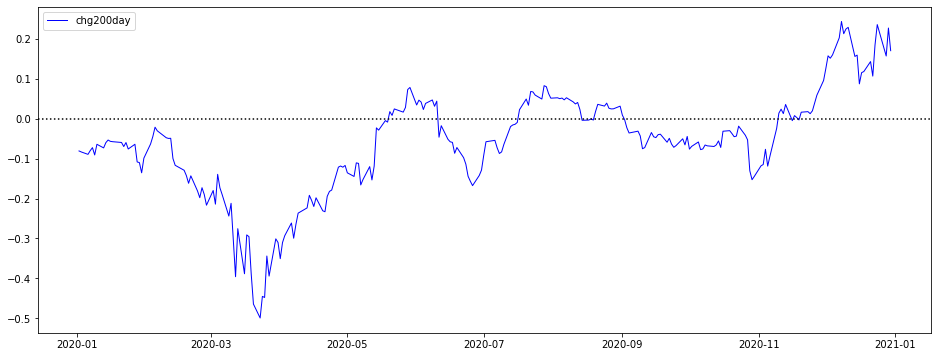

In [47]:
for idx in range(len(col_names)):
    plt.figure(figsize=(16,6))
    plt.plot(col_names[idx], data=df2, marker='', color='blue', linewidth=1, linestyle='solid', label=col_names[idx])
    plt.axhline(y=0, color='black', linestyle="dotted")
    plt.legend()